THAITQSE170293

IMPORT NECESSARY LIBRARY

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing

LOAD DATA

In [63]:
df = pd.read_csv('lab1_kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


DROP THE UNNECESSARY COLUMNS

In [64]:
df.drop('date', axis = 1, inplace = True)

CREATE X AND Y

In [65]:
features = [x for x in df.columns if x not in ['price']]
X = df[features]
y = df['price']

CHECK SHAPE

In [66]:
print('shape of X: ', X.shape)
print('shape of y: ', y.shape)

shape of X:  (21613, 19)
shape of y:  (21613,)


STANDARDLIZE THE DATA

In [67]:
X = preprocessing.StandardScaler().fit_transform(X)

SPLIT TRAIN AND SET BEFORE FIT TO MODEL

In [68]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

WE'LL START WITH A SIMPLE LINEAR MODEL

In [69]:
l_model = linear_model.LinearRegression()
l_model.fit(X_train, y_train)
y_pred = l_model.predict(X_test)

In [70]:
print('R2 score: ', metrics.r2_score(y_test, y_pred))

R2 score:  0.7010826099067332


THE SCORE SEEMED FINE, LET'S PLOT A FEW SAMPLE

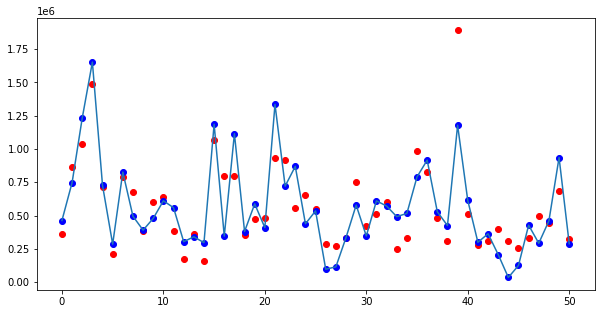

In [72]:
sample_y_pred = l_model.predict(X_test[:51])
plt.figure(figsize = (10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.scatter(range(len(sample_y_pred)), sample_y_pred, color= 'blue')
plt.plot(sample_y_pred)
plt.show()

LET'S SEE IF WE CAN IMPROVE THE R2_SCORE WITH POLYNOMIAL

In [73]:
poly_transform = preprocessing.PolynomialFeatures(degree= 2)
X_poly = poly_transform.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = model_selection.train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [74]:
p_model = linear_model.LinearRegression()
p_model.fit(X_poly_train, y_train)
y_poly_pred= p_model.predict(X_poly_test)
print('R2 score: ', metrics.r2_score(y_test, y_poly_pred))

R2 score:  0.7995213535309216


GREAT, THE DATA SEEM FIT TO THE POLYNOMIAL TRANSFORM

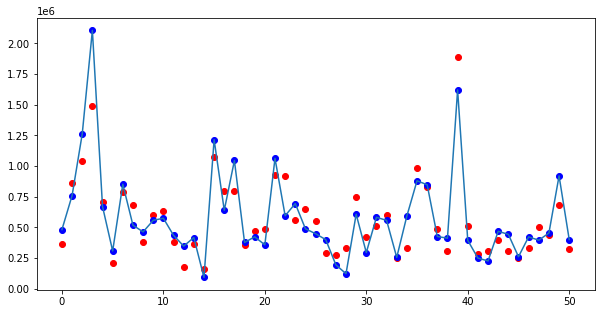

In [75]:
sample_y_poly_pred = p_model.predict(X_poly_test[:51])
plt.figure(figsize = (10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.scatter(range(len(sample_y_poly_pred)), sample_y_poly_pred, color= 'blue')
plt.plot(sample_y_poly_pred)
plt.show()

TRY TO DO SOME REGULARIZATION IF WE CAN IMPROVE THE MODEL  
WE'LL START WITH L1 REGULARIZATION - LASSO

In [76]:
lasso_model = linear_model.Lasso(alpha = 0.1)
lasso_model.fit(X_poly_train, y_train)
y_lasso_pred = lasso_model.predict(X_poly_test)
print('R2 score: ', metrics.r2_score(y_test, y_lasso_pred))

R2 score:  0.7991006111300112


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


THE SCORE IT PRETTY MUCH THE SAME AS POLYNOMIAL

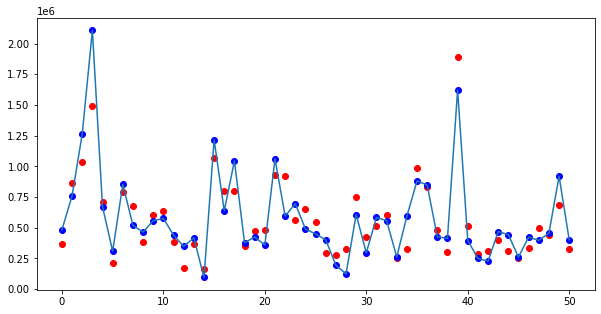

In [77]:
sample_y_lasso_pred = lasso_model.predict(X_poly_test[:51])
plt.figure(figsize = (10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.scatter(range(len(sample_y_lasso_pred)), sample_y_lasso_pred, color= 'blue')
plt.plot(sample_y_lasso_pred)
plt.show()

LET'S TRY L2 REGULARIZATION

In [78]:
ridge_model = linear_model.Ridge(alpha= 0.1)
ridge_model.fit(X_poly_train, y_train)
y_ridge_pred = ridge_model.predict(X_poly_test)
print('R2 score: ', metrics.r2_score(y_test, y_ridge_pred))

R2 score:  0.7995034331371538


SAME FOR L2

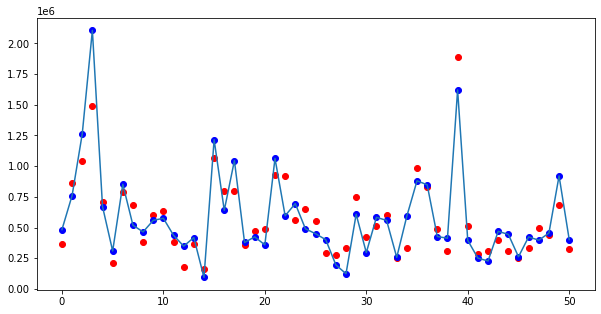

In [79]:
sample_y_ridge_pred = ridge_model.predict(X_poly_test[:51])
plt.figure(figsize = (10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.scatter(range(len(sample_y_ridge_pred)), sample_y_ridge_pred, color= 'blue')
plt.plot(sample_y_ridge_pred)
plt.show()

IT'S SEEM THAT L1 AND L2 CAN'T DO MUCH TO IMPROVE OUR MODEL  
WHAT ABOUT WE USE BOTH OF THEM IN THE SAME TIME ?

In [80]:
elas_model = linear_model.ElasticNet(alpha = 0.1, l1_ratio=0.1)
elas_model.fit(X_poly_train, y_train)
y_elas_pred = elas_model.predict(X_poly_test)
print('R2 score: ', metrics.r2_score(y_test, y_elas_pred))

R2 score:  0.7972481786035638


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


THE SCORE SEEM WORSE

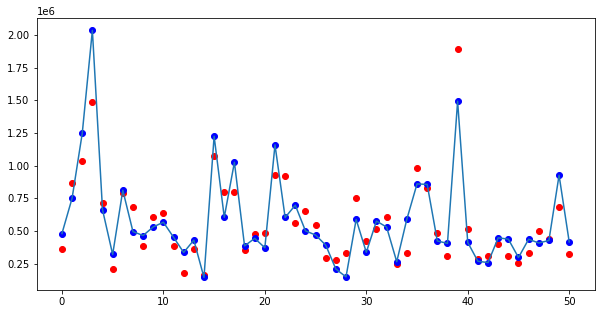

In [81]:
sample_y_elas_pred = elas_model.predict(X_poly_test[:51])
plt.figure(figsize = (10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.scatter(range(len(sample_y_elas_pred)), sample_y_elas_pred, color= 'blue')
plt.plot(sample_y_elas_pred)
plt.show()

LET'S COMPARE THEM WITH EACH OTHERS

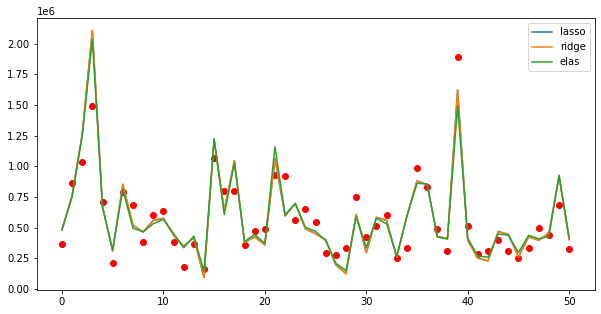

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test.iloc[:51])),y_test.iloc[:51], color = 'red')
plt.plot(sample_y_lasso_pred, label = 'lasso')
plt.plot(sample_y_ridge_pred, label = 'ridge')
plt.plot(sample_y_elas_pred, label= 'elas')
plt.legend()
plt.show()